<h1>Clustering Algorithms</h1>
<h3>Unsupervised learning</h3>
<ul>
<li>The algorithm tries to group similar data together (clusters)
<li>Using the values of the feature space
</ul>
<h3>K-Means Clusterng</h3>
<ul>
<li>partitions the dataspace into clusters
<li>minimizes distance between the mean of a cluster and the data points
<li>the desired number of clusters must be known in advance
</ul>

<h2>Image recognition dataset</h2>
<ul>
<li>Digits 0-9 pixelated into 64 quadrants
<li>Each value represents the area that is shaded


<h2>Do imports</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

<h2>Load data</h2>

In [2]:
digits = load_digits()
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [3]:
print(digits['DESCR'])


Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

<h2>scale the data to normal distribution</h2>

In [4]:
data = scale(digits.data)

In [5]:
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ..., 
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

<h2>Render the digit images and their associated values</h2>

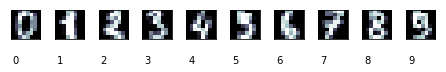

In [6]:
def print_digits(images,y,max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1,
           hspace=.05, wspace=.5)
    i = 0
    while i <max_n and i <images.shape[0]:
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[],
              yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        # label the image with the target value
        p.text(0, 14, str(y[i]))
        i = i + 1
print_digits(digits.images, digits.target, max_n=10)

<h2>Training and testing samples</h2>

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, images_train,images_test = train_test_split(
        data, digits.target, digits.images,  test_size=0.25, 
          random_state=42)

n_samples, n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train

In [8]:
len(np.unique(y_train))

10

<h2>Create the model and fit the data</h2>

In [9]:
from sklearn import cluster
clf = cluster.KMeans(init='k-means++',n_clusters=10, random_state=42)
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

k-means++ runs an initializer before using the k-means algorithm

In [10]:
images_train

array([[[  0.,   0.,   2., ...,  16.,  11.,   0.],
        [  0.,   0.,   8., ...,   3.,   0.,   0.],
        [  0.,   0.,  13., ...,   0.,   0.,   0.],
        ..., 
        [  0.,   6.,  16., ...,  16.,   5.,   0.],
        [  0.,   0.,   3., ...,   8.,   0.,   0.],
        [  0.,   0.,   4., ...,   0.,   0.,   0.]],

       [[  0.,   5.,  16., ...,   0.,   0.,   0.],
        [  0.,  11.,  14., ...,   0.,   0.,   0.],
        [  0.,   8.,  11., ...,   0.,   0.,   0.],
        ..., 
        [  0.,   0.,   0., ...,   5.,   1.,   0.],
        [  0.,   1.,  11., ...,  16.,  10.,   0.],
        [  0.,   5.,  16., ...,   6.,   1.,   0.]],

       [[  0.,   0.,   4., ...,   0.,   0.,   0.],
        [  0.,   0.,  13., ...,   7.,   0.,   0.],
        [  0.,   3.,  16., ...,  15.,   6.,   0.],
        ..., 
        [  0.,   4.,  12., ...,  11.,   6.,   0.],
        [  0.,   0.,  14., ...,  14.,   1.,   0.],
        [  0.,   0.,   7., ...,   2.,   0.,   0.]],

       ..., 
       [[  0.,   0., 

<h2>Call print_digits with training images, and computed labels</h2>
<h2>Returned labels are cluster numbers</h2>

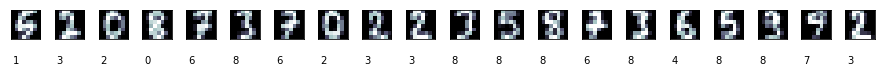

In [11]:
print_digits(images_train, clf.labels_, max_n=20)

<h2>Use test sample to generate predictions</h2>

In [12]:
y_pred=clf.predict(X_test)
y_pred

array([4, 8, 8, 9, 3, 3, 5, 8, 5, 3, 0, 7, 1, 2, 1, 3, 8, 6, 8, 8, 1, 5, 8,
       6, 5, 4, 8, 5, 4, 8, 1, 8, 3, 1, 1, 4, 8, 1, 6, 4, 4, 8, 0, 8, 4, 7,
       8, 2, 4, 5, 5, 0, 8, 5, 4, 2, 8, 2, 2, 7, 2, 1, 5, 3, 1, 5, 6, 2, 6,
       8, 8, 8, 8, 6, 6, 2, 1, 5, 8, 8, 8, 2, 3, 8, 8, 2, 4, 1, 1, 8, 0, 3,
       7, 8, 8, 3, 8, 2, 1, 1, 1, 8, 5, 8, 7, 6, 5, 7, 1, 3, 6, 6, 1, 1, 7,
       8, 0, 6, 8, 6, 3, 4, 8, 7, 2, 6, 3, 6, 5, 0, 5, 5, 6, 7, 2, 4, 4, 1,
       3, 0, 2, 8, 1, 4, 8, 7, 4, 8, 2, 8, 8, 4, 4, 2, 4, 1, 3, 8, 8, 6, 6,
       3, 8, 2, 1, 5, 0, 4, 5, 6, 8, 0, 1, 0, 0, 8, 6, 6, 3, 3, 8, 8, 8, 2,
       8, 0, 3, 5, 4, 8, 8, 1, 0, 5, 9, 3, 8, 4, 1, 0, 8, 8, 5, 6, 0, 8, 1,
       0, 0, 5, 1, 1, 8, 4, 0, 8, 4, 2, 1, 5, 3, 6, 7, 4, 1, 5, 4, 2, 8, 3,
       8, 4, 6, 7, 8, 3, 1, 6, 4, 5, 0, 8, 5, 0, 2, 3, 0, 0, 6, 5, 6, 4, 3,
       3, 3, 8, 1, 0, 5, 8, 4, 2, 8, 6, 6, 2, 0, 2, 1, 8, 0, 5, 8, 4, 2, 1,
       3, 2, 2, 8, 4, 8, 8, 6, 8, 5, 8, 8, 8, 0, 5, 8, 8, 7, 2, 5, 0, 8, 1,
       2, 3,

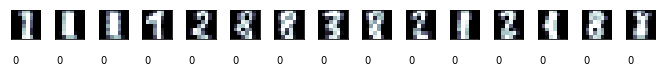

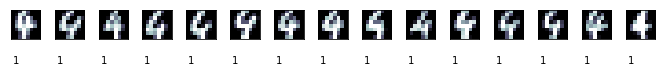

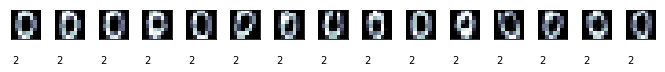

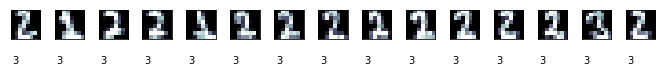

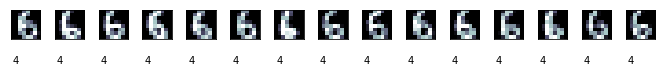

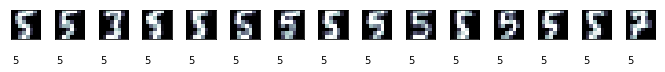

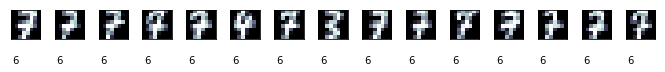

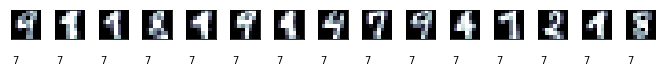

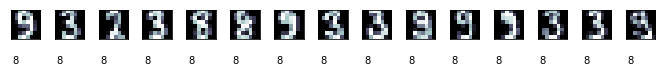

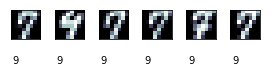

In [13]:
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images, y_pred,max_n=15)
for i in range(10):
      print_cluster(images_test, y_pred, i)


<h1>Evaluating the model</h1>
<li>Adjusted rand index: A measure of the similarity between two groups</li>
<li>We'll use it to see how similar the y_test actuals and predicted groupings are</li>
<li>http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html</li>
<li>0.0 indicates that there is no similarity and any overlap is explainable as totally random</li>
<li>1.0 indicates that the two groups are identical</li>


In [14]:
from sklearn import metrics
print("Adjusted rand score: {0:2}".format(metrics.adjusted_rand_score(y_test, y_pred)))

Adjusted rand score: 0.5674467844660916


<h2>Confusion matrix</h2>
<li>Each row corresponds to a number (y_test)
<li>Each column to y_pred (the cluster number)
<li>Data is the number of times y_test was assigned to the corresponding y_pred
<li>For example, 0 is fully assigned to cluster 2 (Row 0, Column 2)
<li>8 is assigned to cluster 0  21 times (Row 8, Column 0)
<li>7, which is cluster 6 is assigned to cluster 6 34 times (Row 7, Column 6)


In [15]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


<h2>Graphical view of the clusters</h2>

<li>First reduce the x dimensions to 2 using principle component analysis</li>
<li>https://en.wikipedia.org/wiki/Principal_component_analysis</li>
<li>Then figure out the range of values and define the grid</li>
<li>Run k-means on the reduced (2 component) data set</li>
<li>Draw a color map and plot the pca points on this map</li>
<li>Find the cluster centroids and plot them on the color map</li>



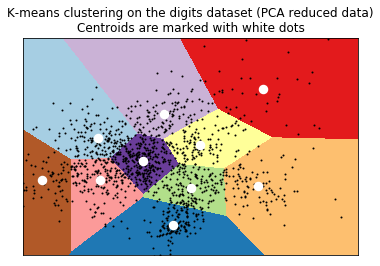

In [16]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2).fit(X_train)
reduced_X_train = pca.transform(X_train)
# Step size of the mesh. 
h = .01     
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = reduced_X_train[:, 0].min() + 1, reduced_X_train[:, 0].max() - 1
y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
    np.arange(y_min, y_max, h))
kmeans = cluster.KMeans(init='k-means++', n_clusters=n_digits, 
    n_init=10)
kmeans.fit(reduced_X_train)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')
plt.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', 
    markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],marker='.', 
    s=169, linewidths=3, color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA reduced data)\nCentroids are marked with white dots')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()